In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df=pd.read_csv('out_1.csv')
df.set_index("Unnamed: 0", inplace=True)

df

insum        outsum     inavg    outavg  ratiosum  ratioavg
Unnamed: 0                                                                   
FR          2022.214797   8660.907374  0.467780  0.629701  0.233488  0.742861
DE          3740.299314  17551.170290  0.432755  0.541820  0.213108  0.798706
AE            44.668447    451.766980  0.875852  0.757998  0.098875  1.155480
AT           555.540707   6945.598810  0.496906  0.526501  0.079985  0.943789
BG           608.368771   3022.963181  0.802597  0.690647  0.201249  1.162094
...                 ...           ...       ...       ...       ...       ...
CF             0.000000      5.418080  0.000000  1.806027  0.000000  0.000000
ER             0.000000      2.102620  0.000000  2.102620  0.000000  0.000000
CK             0.000000      3.558780  0.000000  1.779390  0.000000  0.000000
NR             3.250090      2.407050  1.625045  2.407050  1.350238  0.675119
VI             1.000030      0.000000  1.000030       NaN       inf       NaN

[219 rows x 6 columns]

In [2]:
subdf=df.loc[["US","FR","DE","GB", "CH", "RU","UA","IR","IL","SA","QA","JP","KR","CN","AU", "NZ"]]

subdf

insum        outsum     inavg    outavg   ratiosum  \
Unnamed: 0                                                              
US          85749.330164   2591.702864  2.540796  1.185049  33.086096   
FR           2022.214797   8660.907374  0.467780  0.629701   0.233488   
DE           3740.299314  17551.170290  0.432755  0.541820   0.213108   
GB           2987.713210  17440.167104  0.558034  0.740559   0.171312   
CH           1264.569078  11178.822859  0.380894  0.506654   0.113122   
RU           9965.308599   4727.607052  0.963949  0.825206   2.107897   
UA           1912.315607    889.535165  0.780537  0.993894   2.149792   
IR           2098.982062    109.747250  4.592959  1.925390  19.125601   
IL            315.290311    848.425258  1.110177  1.245852   0.371618   
SA            217.973272    142.582594  1.289783  1.168710   1.528751   
QA             18.666624     34.760463  1.166664  1.121305   0.537007   
JP           1140.094042   1845.173363  1.141235  1.269906   0.617879   
KR           1341.087622    581.705575  1.229228  1.563725   2.305441   
CN           1424.846050   1614.587749  2.324382  1.149991   0.882483   
AU           2679.982921   5390.112250  1.433913  1.153953   0.497204   
NZ            573.988926    411.189398  1.542981  1.757220   1.395923   

            ratioavg  
Unnamed: 0            
US          2.144043  
FR          0.742861  
DE          0.798706  
GB          0.753530  
CH          0.751783  
RU          1.168131  
UA          0.785332  
IR          2.385469  
IL          0.891099  
SA          1.103595  
QA          1.040452  
JP          0.898677  
KR          0.786090  
CN          2.021217  
AU          1.242610  
NZ          0.878081

In [3]:
subdf.index

Index(['US', 'FR', 'DE', 'GB', 'CH', 'RU', 'UA', 'IR', 'IL', 'SA', 'QA', 'JP',
       'KR', 'CN', 'AU', 'NZ'],
      dtype='object', name='Unnamed: 0')

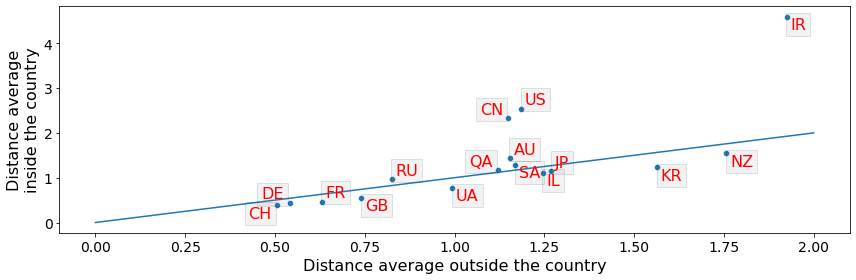

In [47]:
bar=sns.scatterplot(data=subdf, x="outavg", y="inavg", sizes=20)
#bar.set(xlabel='Distance average inside the country',fontsize=18, ylabel='Distance average outside the country')
#sns.scatterplot(data=subdf,x="ratiosum",y="ratioavg")
vu = +0.1
vd = -0.28
hl = -0.08
hr = +0.01
up_left = ["DE", "QA", "CN"]
down_left= ["CH"]
up_right = ["FR", "RU", "US", "AU", "JP"]
down_right = ["GB", "IR"]
for i in range(subdf.shape[0]):
    if (subdf.index[i] in up_left):
        plt.text(x=subdf.outavg[i]+hl,y=subdf.inavg[i]+vu,s=subdf.index[i],
              fontdict=dict(color='red',size=10),
              bbox=dict(facecolor='grey',alpha=0.1), fontsize=16)
    elif (subdf.index[i] in down_left):
        plt.text(x=subdf.outavg[i]+hl,y=subdf.inavg[i]+vd,s=subdf.index[i],
              fontdict=dict(color='red',size=10),
              bbox=dict(facecolor='grey',alpha=0.1), fontsize=16)
    elif (subdf.index[i] in up_right):
        plt.text(x=subdf.outavg[i]+hr,y=subdf.inavg[i]+vu,s=subdf.index[i],
              fontdict=dict(color='red',size=10),
              bbox=dict(facecolor='grey',alpha=0.1), fontsize=16)
    else:
            
        plt.text(x=subdf.outavg[i]+hr,y=subdf.inavg[i]+vd,s=subdf.index[i],
              fontdict=dict(color='red',size=10),
              bbox=dict(facecolor='grey',alpha=0.1), fontsize=16)
sns.lineplot(x=[0, 2.0],y= [0, 2.0])
plt.xscale('linear')
plt.yscale('linear')
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.1,
                       right = 0.9, top = 0.9, wspace = 0, hspace = 0.1)
fig=bar.get_figure()
plt.xlabel('Distance average outside the country', fontsize=16)
plt.ylabel('Distance average\ninside the country', fontsize=16)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
fig.set_size_inches(12, 4)
plt.tight_layout()
plt.show()
fig.savefig("avg_dist.pdf")
